# EDA for xG models

**ATTENTION:**

Notebook language: **R**

In [ ]:
#install.packages(c('Hmisc', 'ggplot2', 'dplyr'))

In [ ]:
df <- read.csv('./data/raw_data.csv')
df <- df[,-1]

In [ ]:
head(df)

,league,id,minute,result,X,Y,player,h_a,player_id,situation,season,shotType,match_id,home_team,away_team,home_goals,away_goals,date,player_assisted,lastAction
,<fct>,<int>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<fct>
1,Ligue_1,425095,7,MissedShots,0.964,0.654,Myron Boadu,h,9612,OpenPlay,2021,LeftFoot,17822,Monaco,Nantes,1,1,2021-08-06 19:00:00,NA,BallRecovery
2,Ligue_1,425098,13,Goal,0.925,0.431,Gelson Martins,h,7012,OpenPlay,2021,RightFoot,17822,Monaco,Nantes,1,1,2021-08-06 19:00:00,Caio Henrique,Throughball
3,Ligue_1,425100,24,BlockedShot,0.785,0.388,Kevin Volland,h,83,OpenPlay,2021,LeftFoot,17822,Monaco,Nantes,1,1,2021-08-06 19:00:00,NA,None
4,Ligue_1,425101,24,MissedShots,0.761,0.525,Jean Lucas,h,7687,OpenPlay,2021,RightFoot,17822,Monaco,Nantes,1,1,2021-08-06 19:00:00,NA,Rebound
5,Ligue_1,425102,30,MissedShots,0.936,0.415,Kevin Volland,h,83,FromCorner,2021,Head,17822,Monaco,Nantes,1,1,2021-08-06 19:00:00,Jean Lucas,Aerial
6,Ligue_1,425104,42,MissedShots,0.751,0.511,Aurelien Tchouameni,h,6560,OpenPlay,2021,RightFoot,17822,Monaco,Nantes,1,1,2021-08-06 19:00:00,Caio Henrique,Pass


In [ ]:
colnames(df)

[1] "league"          "id"              "minute"          "result"         
 [5] "X"               "Y"               "player"          "h_a"            
 [9] "player_id"       "situation"       "season"          "shotType"       
[13] "match_id"        "home_team"       "away_team"       "home_goals"     
[17] "away_goals"      "date"            "player_assisted" "lastAction"

## High-level description

In [ ]:
library(Hmisc)

In [ ]:
describe(df)

df 

 20  Variables      362207  Observations
--------------------------------------------------------------------------------
league 
       n  missing distinct 
  362207        0        5 

lowest : Bundesliga EPL        La_liga    Ligue_1    Serie_A   
highest: Bundesliga EPL        La_liga    Ligue_1    Serie_A   
                                                                 
Value      Bundesliga        EPL    La_liga    Ligue_1    Serie_A
Frequency       63238      76618      71191      70393      80767
Proportion      0.175      0.212      0.197      0.194      0.223
--------------------------------------------------------------------------------
id 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
  362207        0   362207        1   234174   168066    23942    42053 
     .25      .50      .75      .90      .95 
  102498   215830   373062   436474   456657 

lowest :      1      2      3      4      5, highest: 478292 478293 478294 478295 478296
---

## Visualisations

In [ ]:
library(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 8)

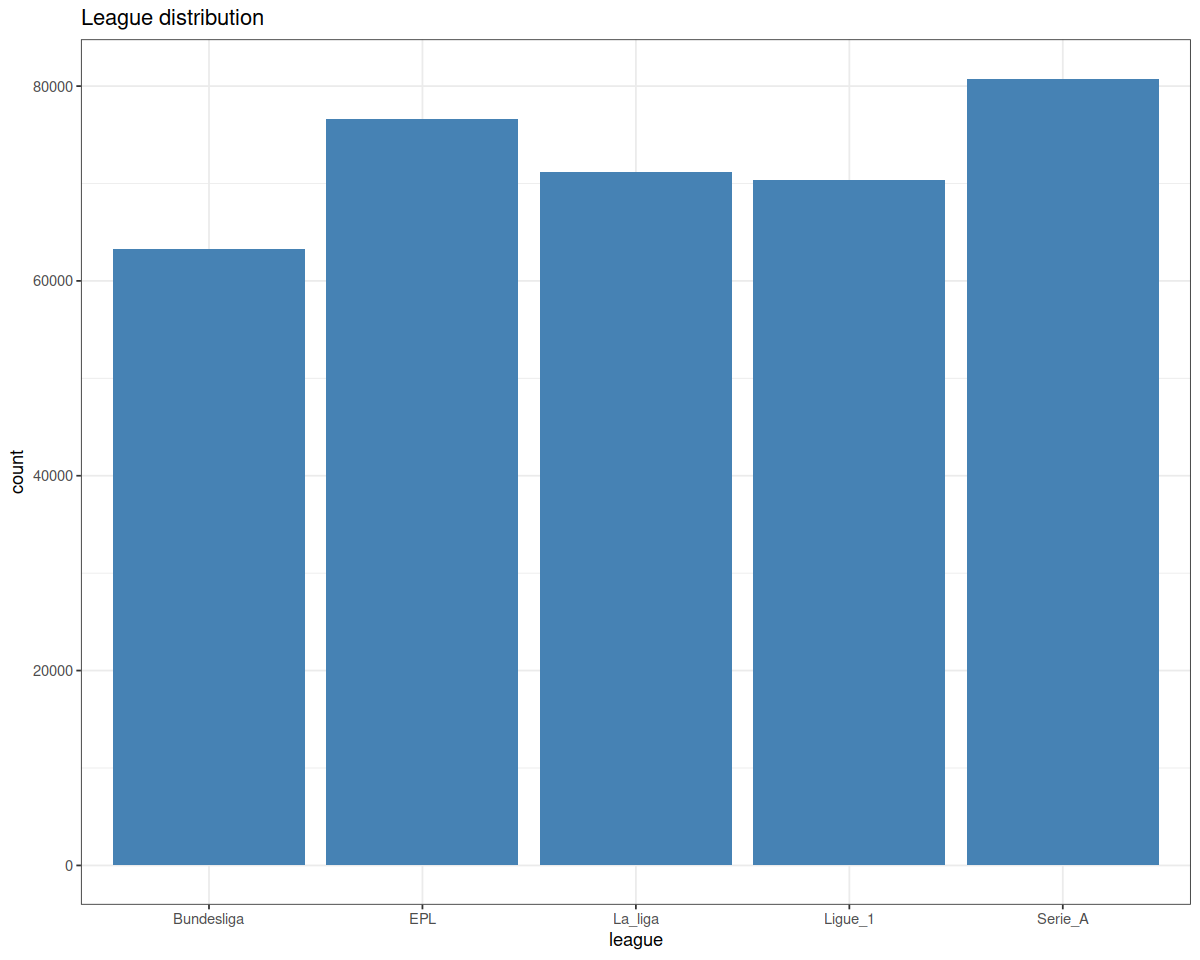

In [ ]:
ggplot(data=df, aes(x=league)) +
    stat_count(fill="steelblue") +
    ggtitle('League distribution') + 
    theme_bw()

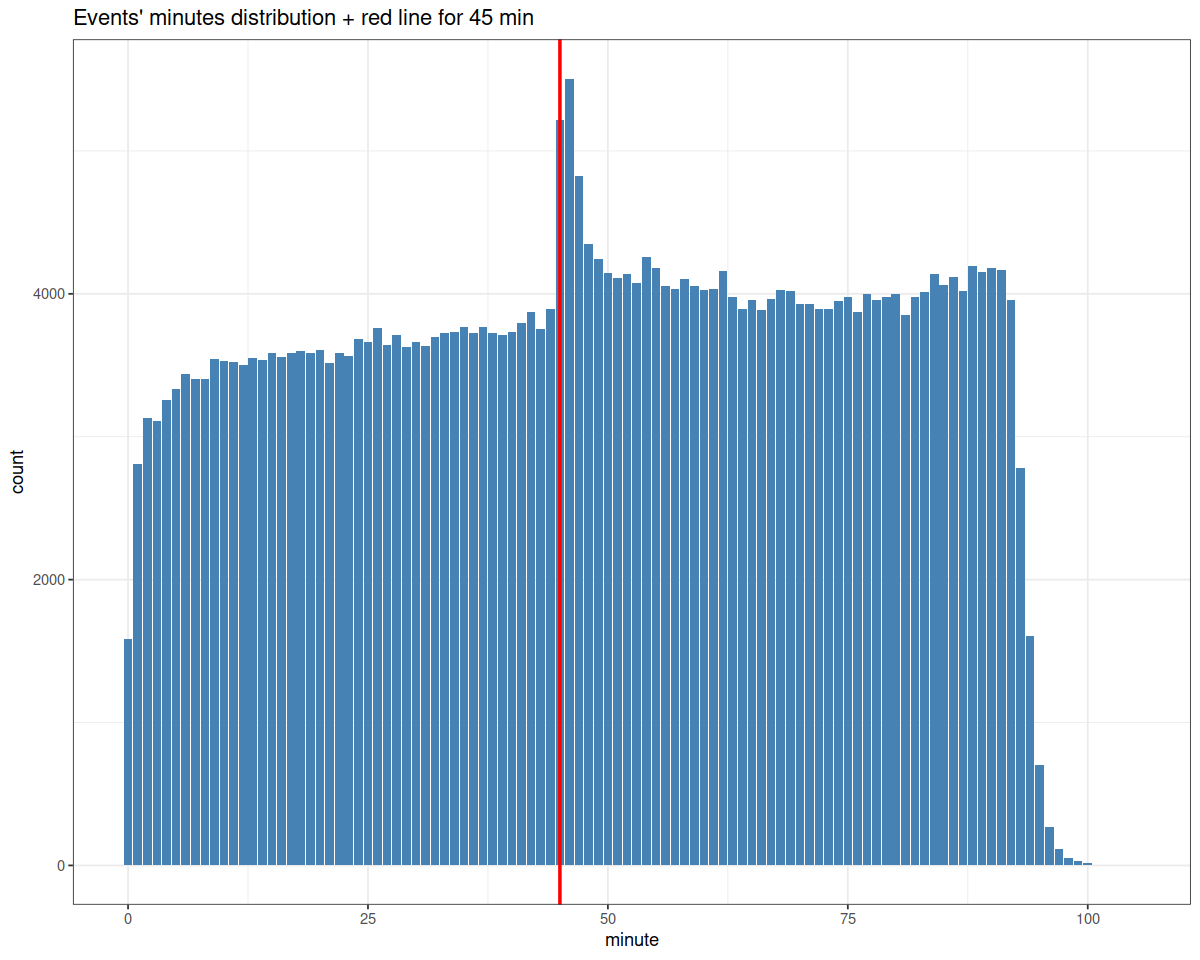

In [ ]:
ggplot(data=df, aes(x=minute)) +
    stat_count(fill="steelblue") +
    geom_vline(xintercept = 45, col='red', size=1) +
    ggtitle('Events\' minutes distribution + red line for 45 min') +
    theme_bw()

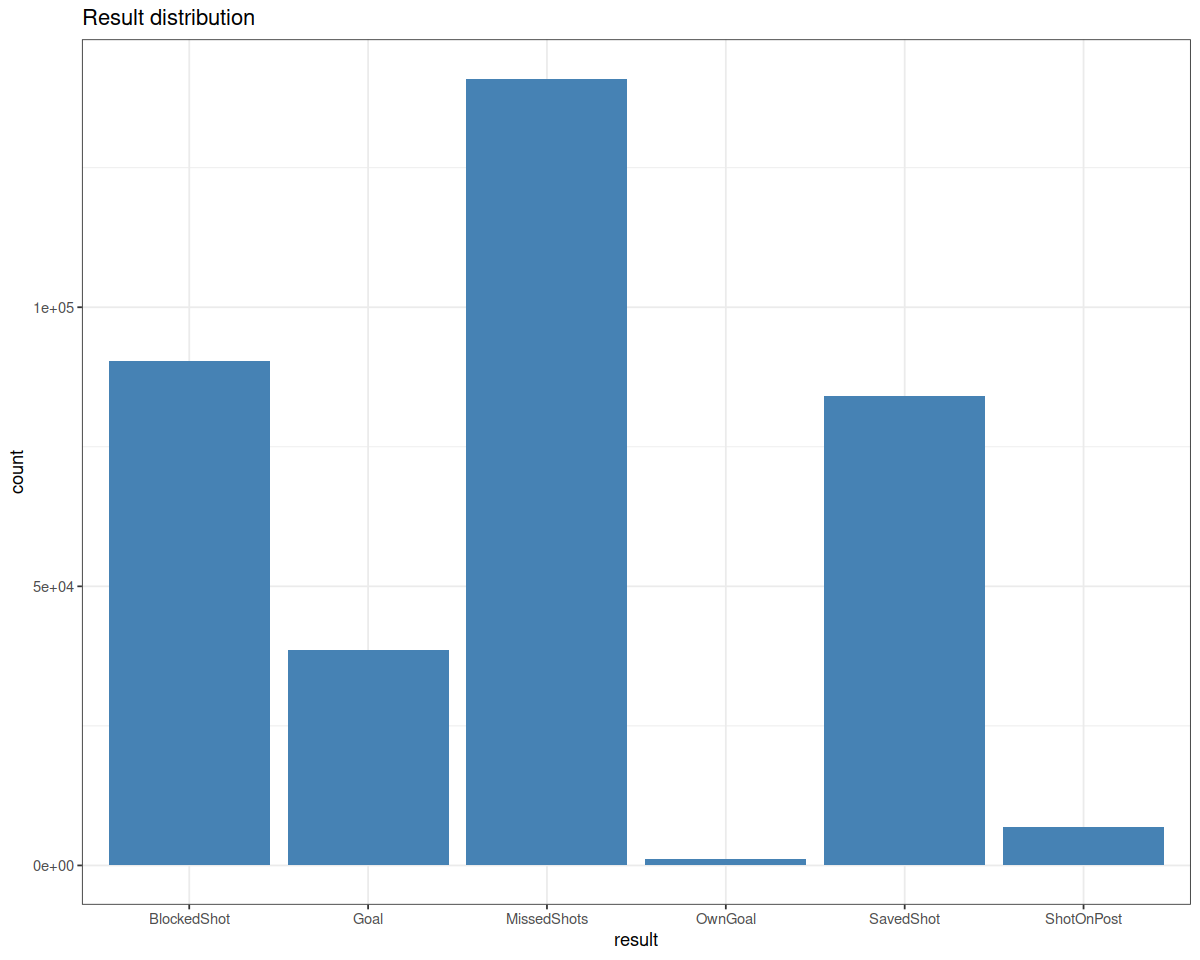

In [ ]:
ggplot(data=df, aes(x=result)) +
    stat_count(fill="steelblue") +
    geom_vline(xintercept = 45, col='red') +
    ggtitle('Result distribution') + 
    theme_bw()

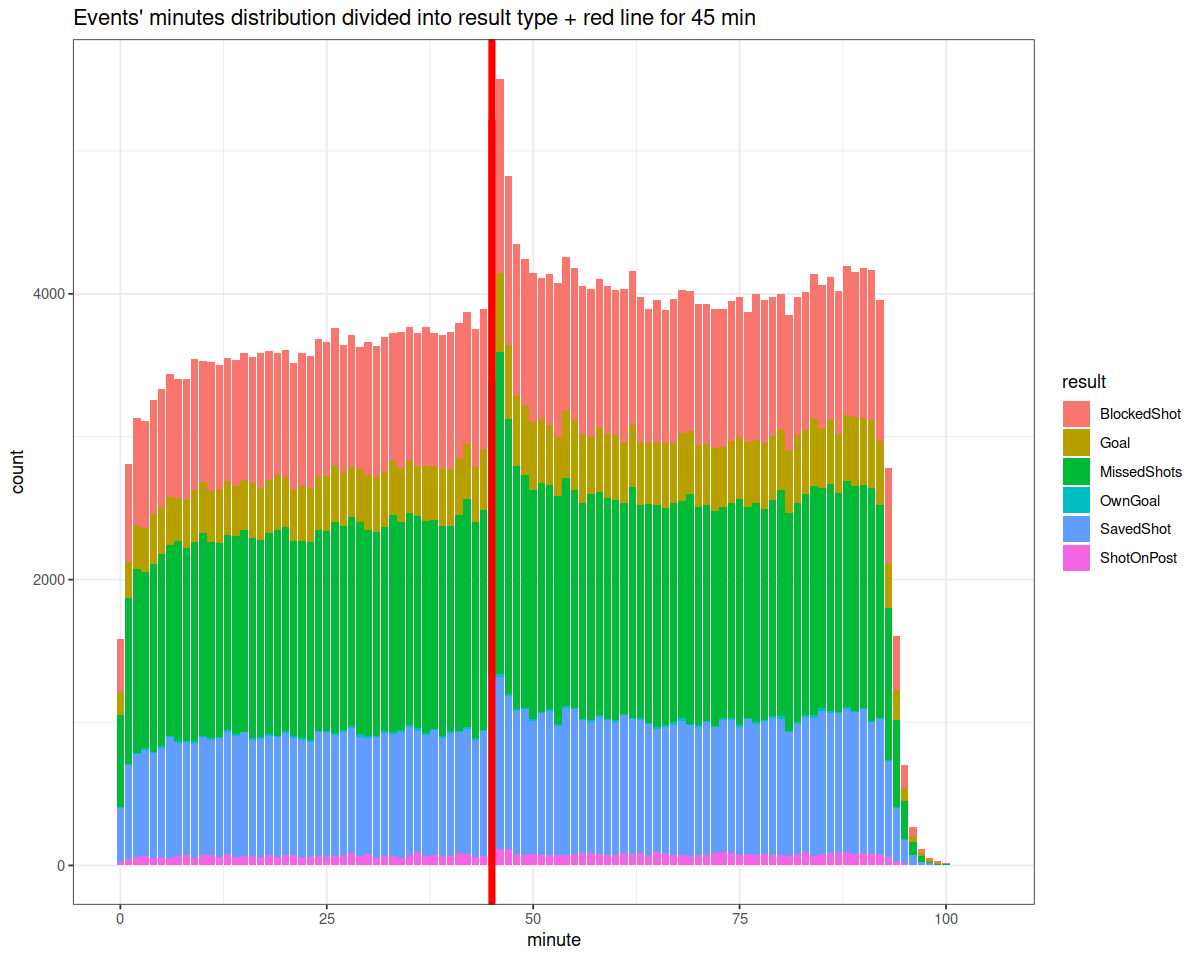

In [ ]:
ggplot(data=df, aes(x=minute, fill=result)) +
    geom_bar(position="stack", stat="count") +
    geom_vline(xintercept = 45, col='red', size=2) +
    ggtitle('Events\' minutes distribution divided into result type + red line for 45 min') +
    theme_bw()

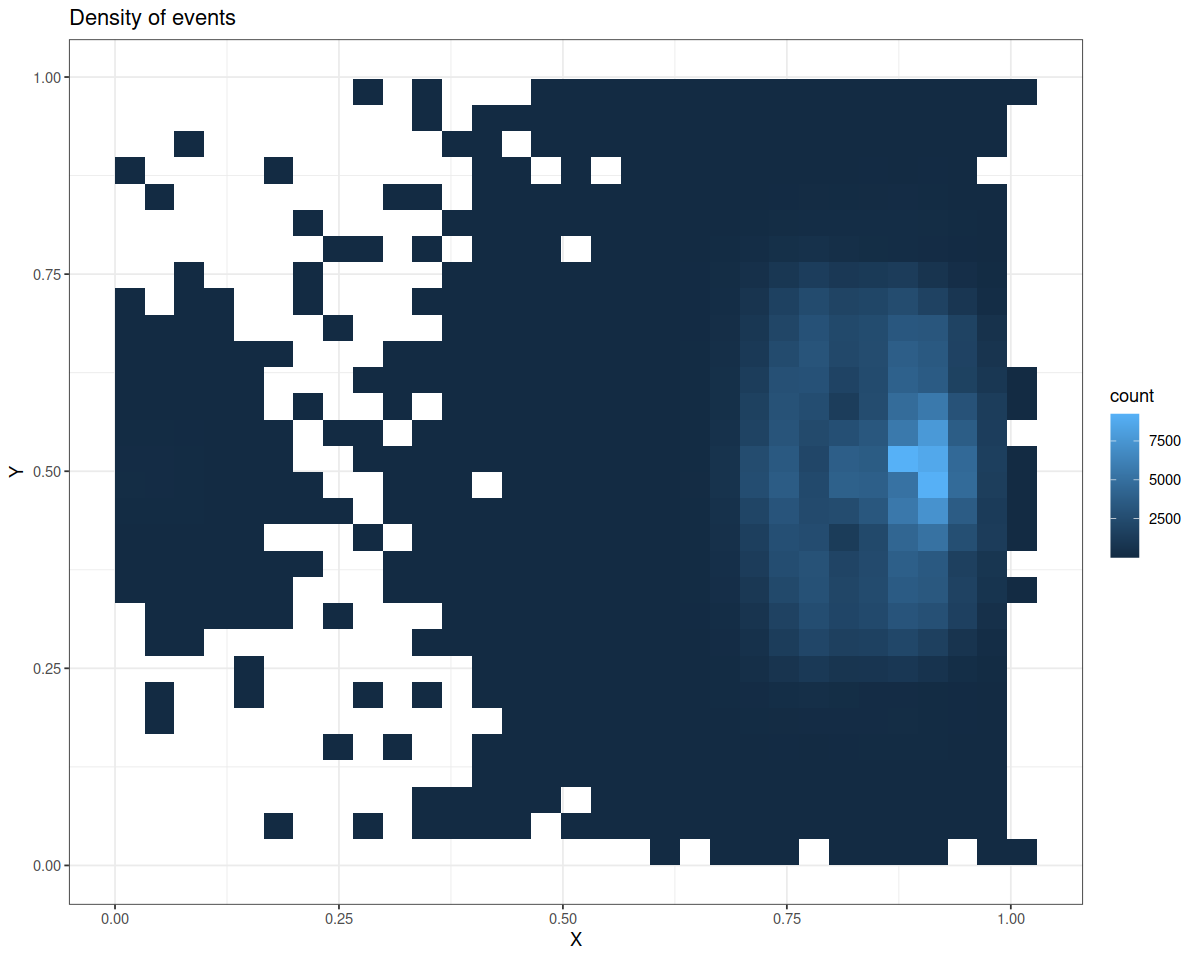

In [ ]:
ggplot(df, aes(x=X, y=Y) ) +
  geom_bin2d() +
  ggtitle('Density of events') +
  theme_bw()

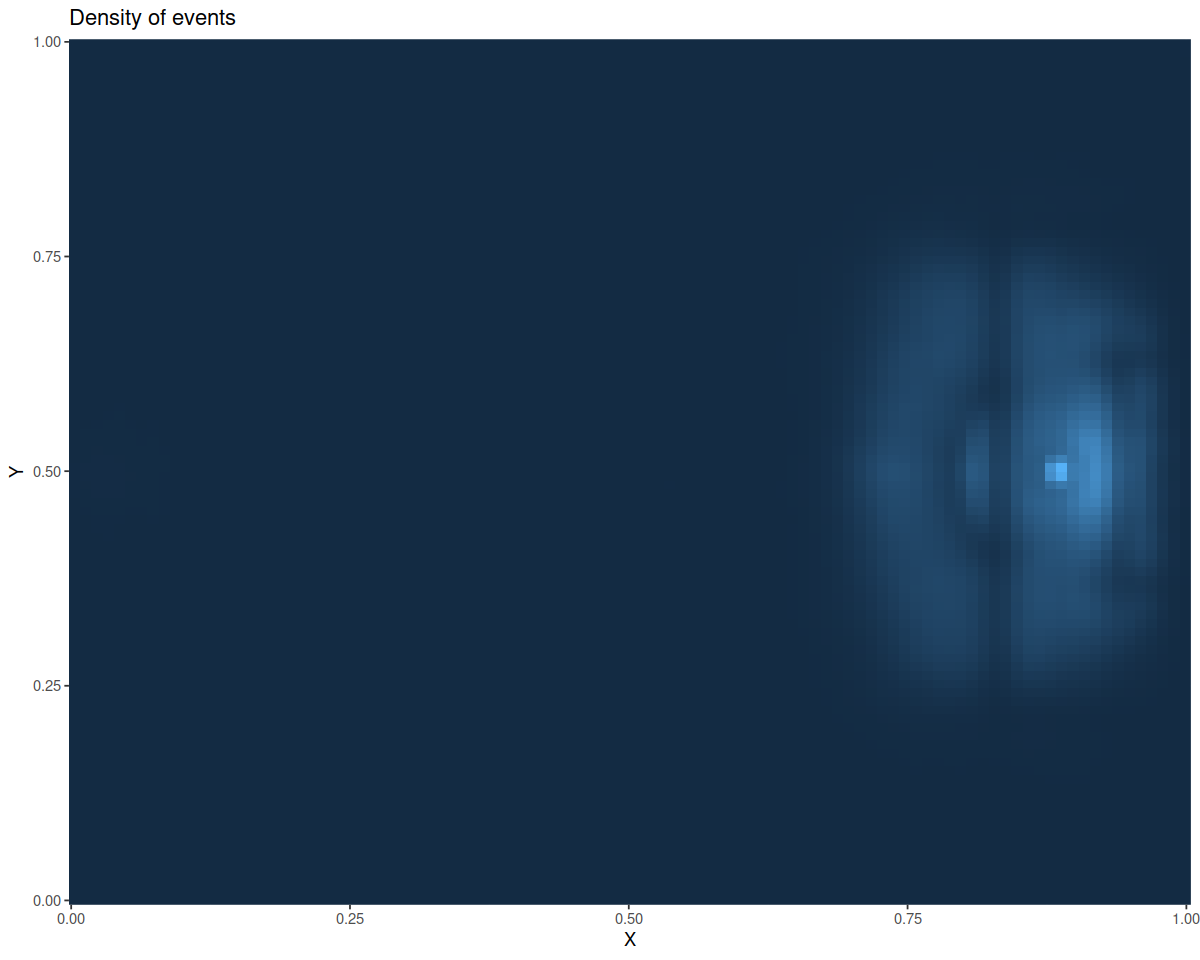

In [ ]:
ggplot(df, aes(x=X, y=Y) ) +
  stat_density_2d(aes(fill = ..density..), geom = "raster", contour = FALSE) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0)) +
  ggtitle('Density of events') +
  theme(legend.position='none')

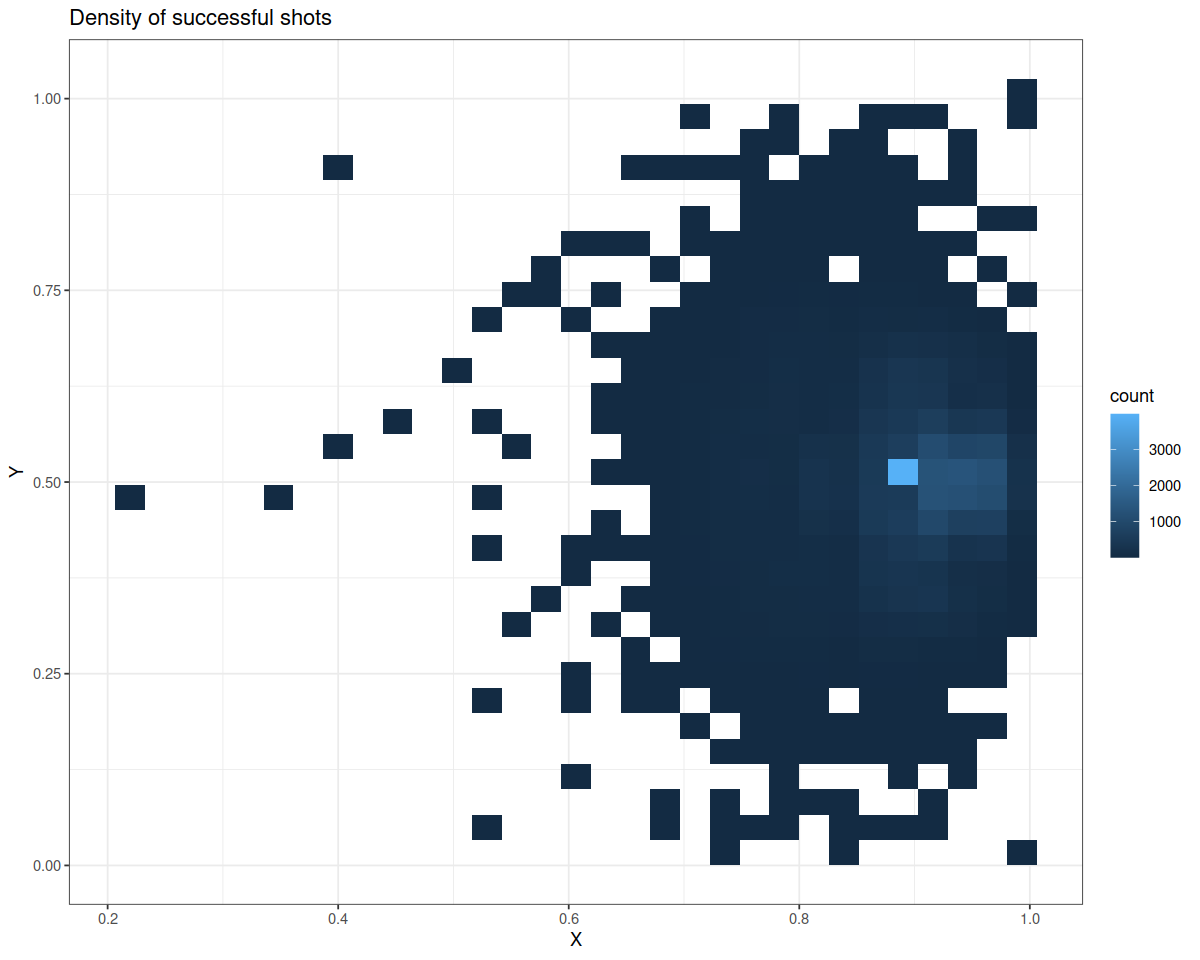

In [ ]:
ggplot(df[df$result == 'Goal',], aes(x=X, y=Y) ) +
  geom_bin2d() +
  ggtitle('Density of successful shots') +
  theme_bw()

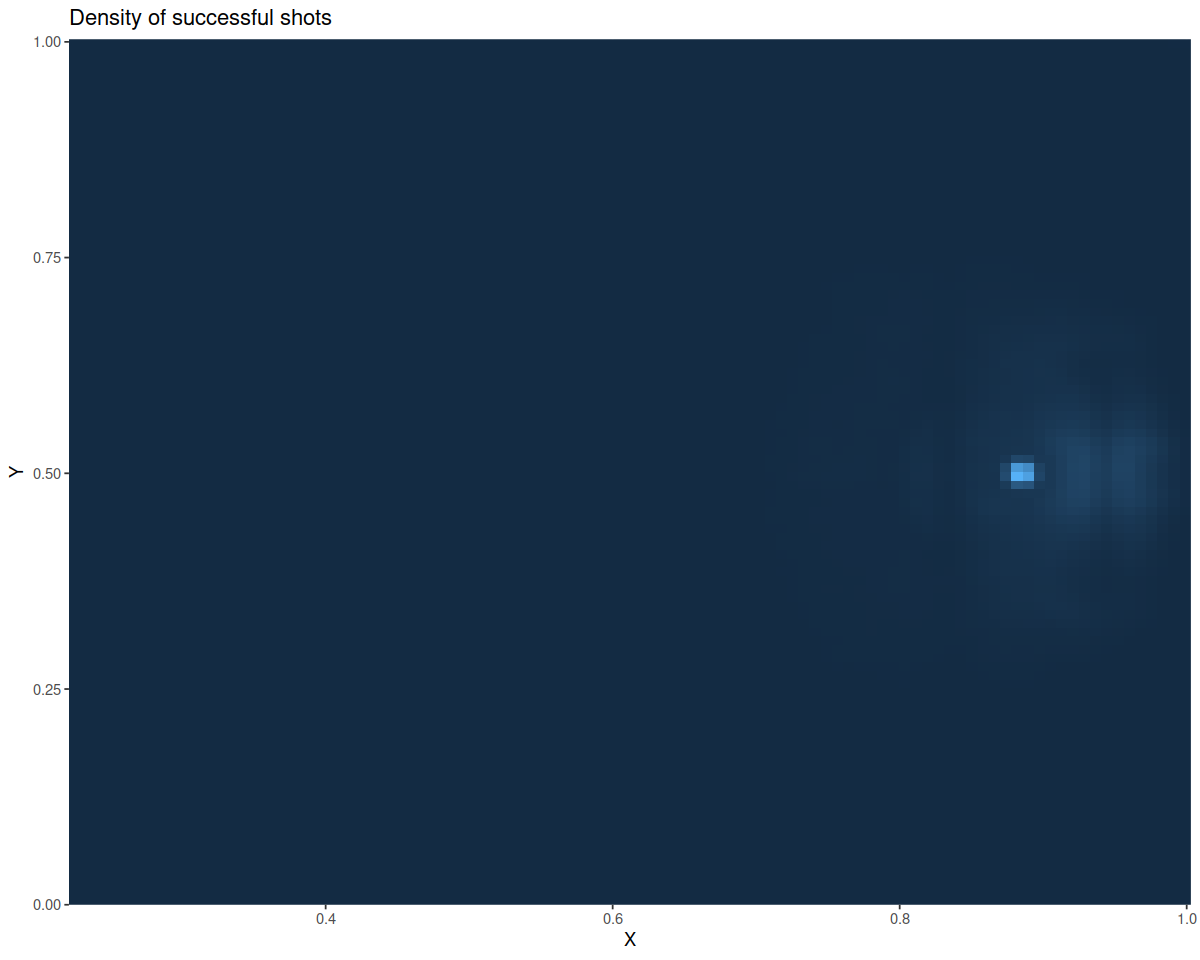

In [ ]:
ggplot(df[df$result == 'Goal',], aes(x=X, y=Y) ) +
  stat_density_2d(aes(fill = ..density..), geom = "raster", contour = FALSE) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0)) +
  ggtitle('Density of successful shots') +
  theme(legend.position='none')

There is certainly high value in a penalty shot point

In [ ]:
sort(table(df$Y),decreasing=TRUE)[1]

0.5 
5471

In [ ]:
sort(table(df$X),decreasing=TRUE)[1]

0.885 
 6628

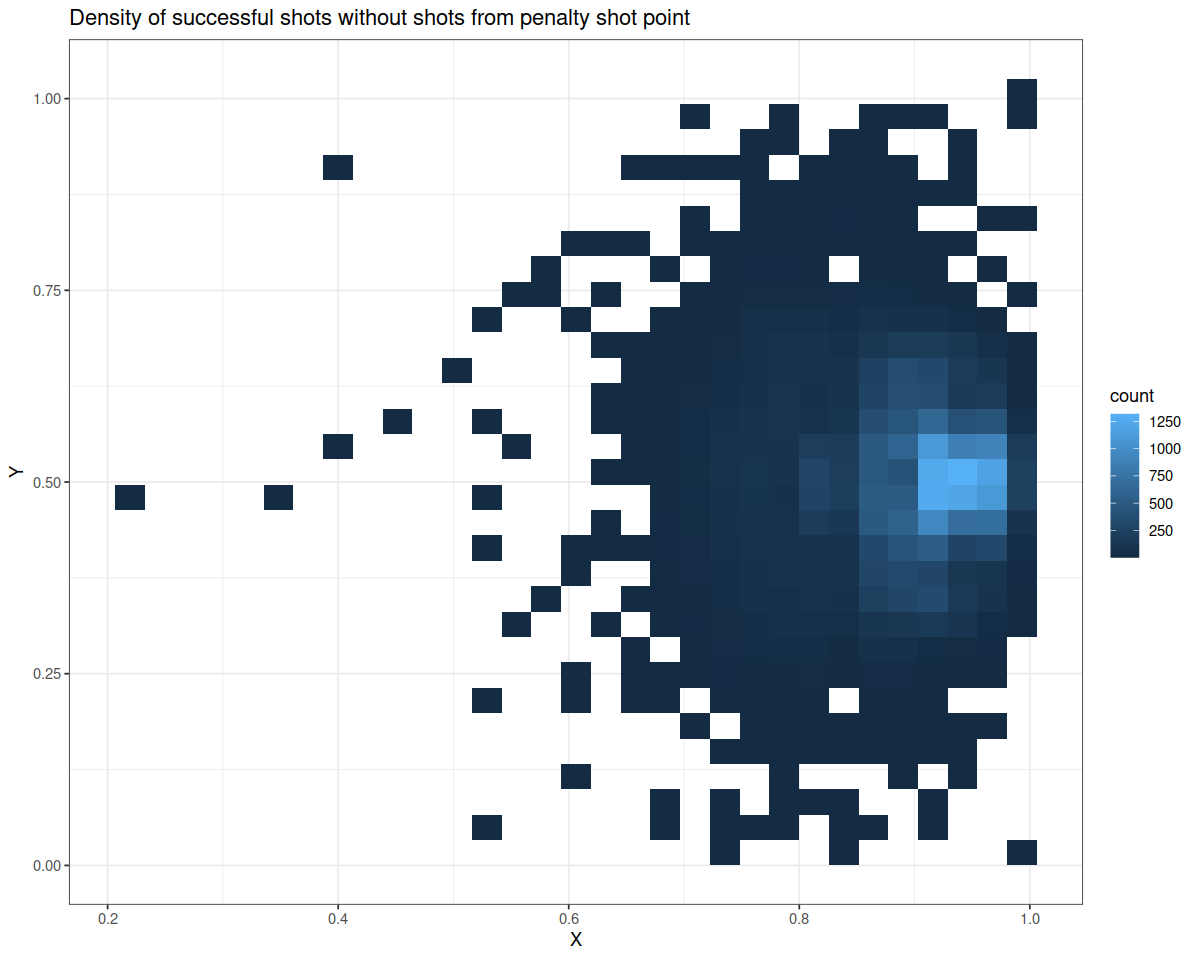

In [ ]:
ggplot(df[df$result == 'Goal'  & df$X != 0.885 & df$Y != 0.5,], aes(x=X, y=Y) ) +
  geom_bin2d() +
  ggtitle('Density of successful shots without shots from penalty shot point') +
  theme_bw()

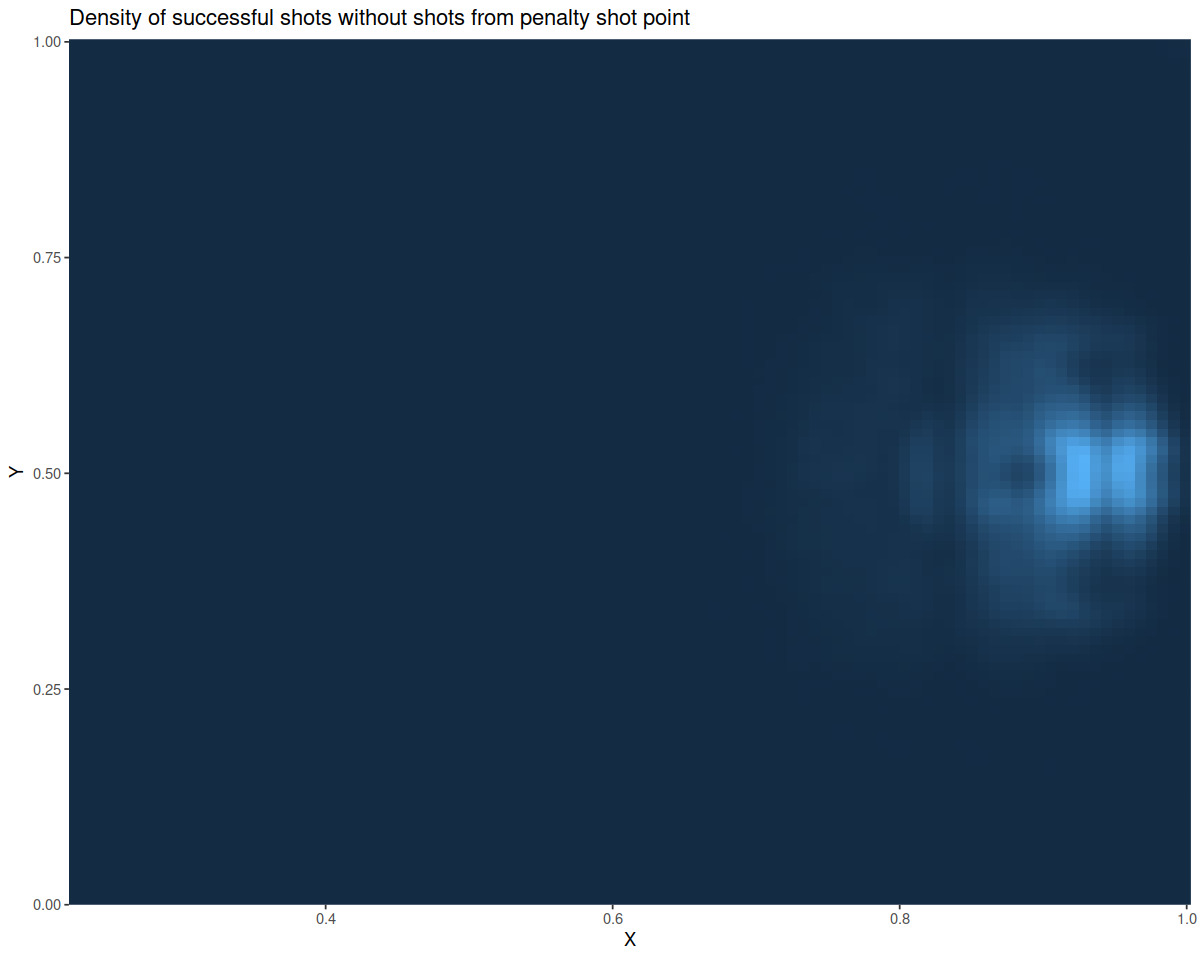

In [ ]:
ggplot(df[df$result == 'Goal'  & df$X != 0.885 & df$Y != 0.5,], aes(x=X, y=Y) ) +
  stat_density_2d(aes(fill = ..density..), geom = "raster", contour = FALSE) +
  scale_x_continuous(expand = c(0, 0)) +
  scale_y_continuous(expand = c(0, 0)) +
  ggtitle('Density of successful shots without shots from penalty shot point') +
  theme(legend.position='none')

In [ ]:
library(dplyr)

In [ ]:
succesful_players <- df %>% group_by(player) %>% summarise(n = n()) %>% arrange(desc(n))
succesful_players <- succesful_players[1:10,]
succesful_players$player <- factor(succesful_players$player, levels = succesful_players$player)

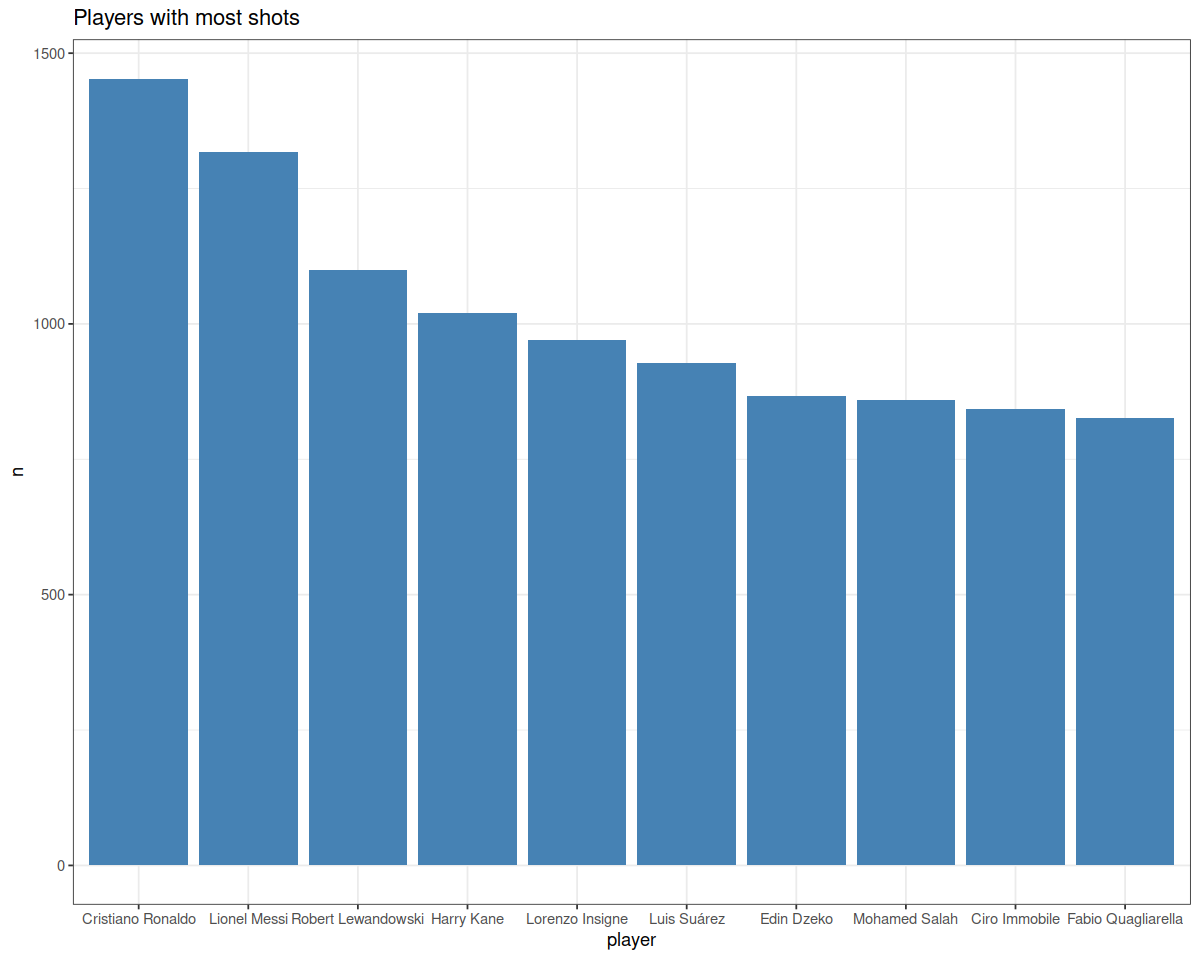

In [ ]:
ggplot(data=succesful_players, aes(x=player, y=n)) +
    geom_bar(fill="steelblue", stat='identity') +
    ggtitle('Players with most shots') + 
    theme_bw()

In [ ]:
succesful_players <- df[df$result == 'Goal',] %>% group_by(player) %>% summarise(n = n()) %>% arrange(desc(n))
succesful_players <- succesful_players[1:10,]
succesful_players$player <- factor(succesful_players$player, levels = succesful_players$player)

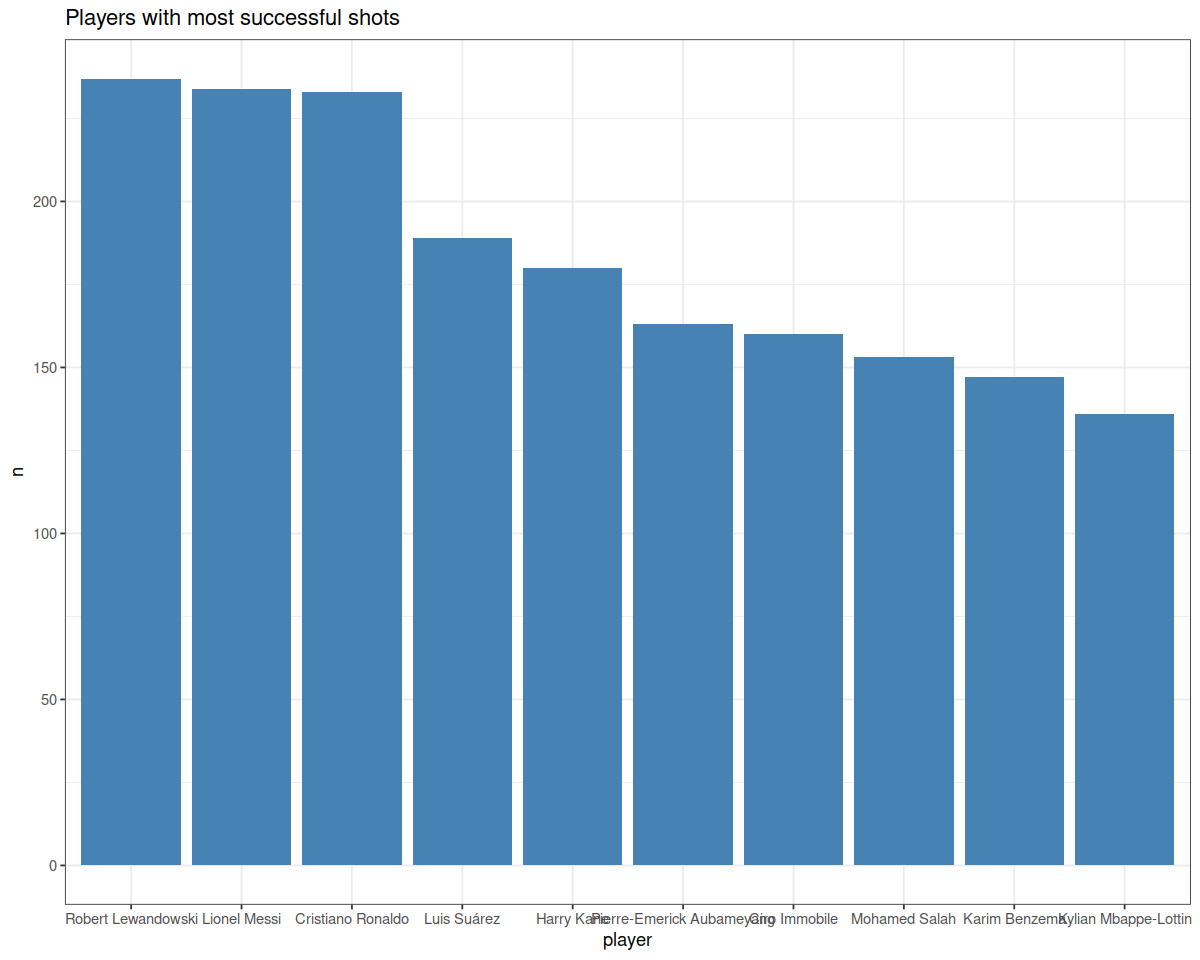

In [ ]:
ggplot(data=succesful_players, aes(x=player, y=n)) +
    geom_bar(fill="steelblue", stat='identity') +
    ggtitle('Players with most successful shots') + 
    theme_bw()

# Home? Away?

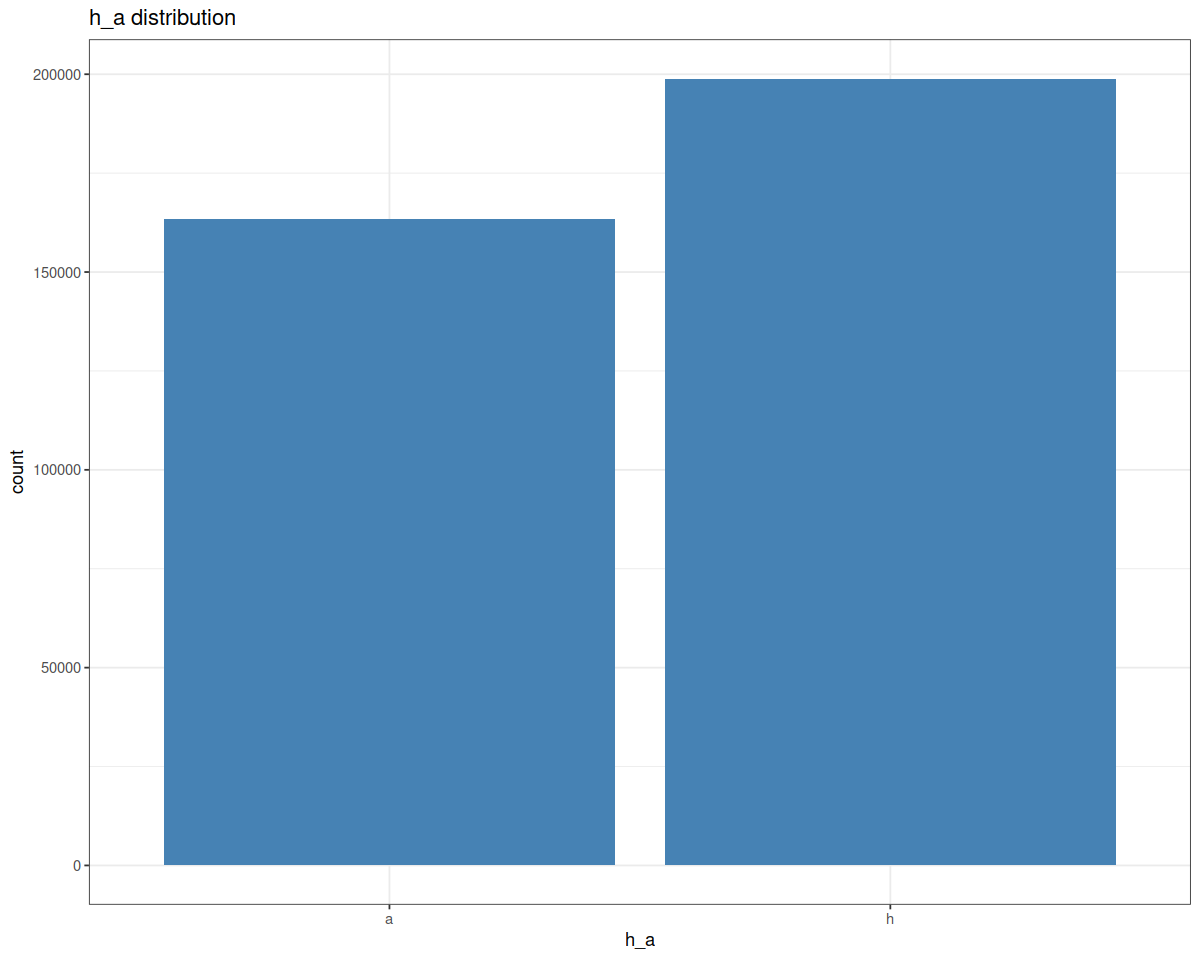

In [ ]:
ggplot(data=df, aes(x=h_a)) +
    stat_count(fill="steelblue") +
    ggtitle('h_a distribution') + 
    theme_bw()

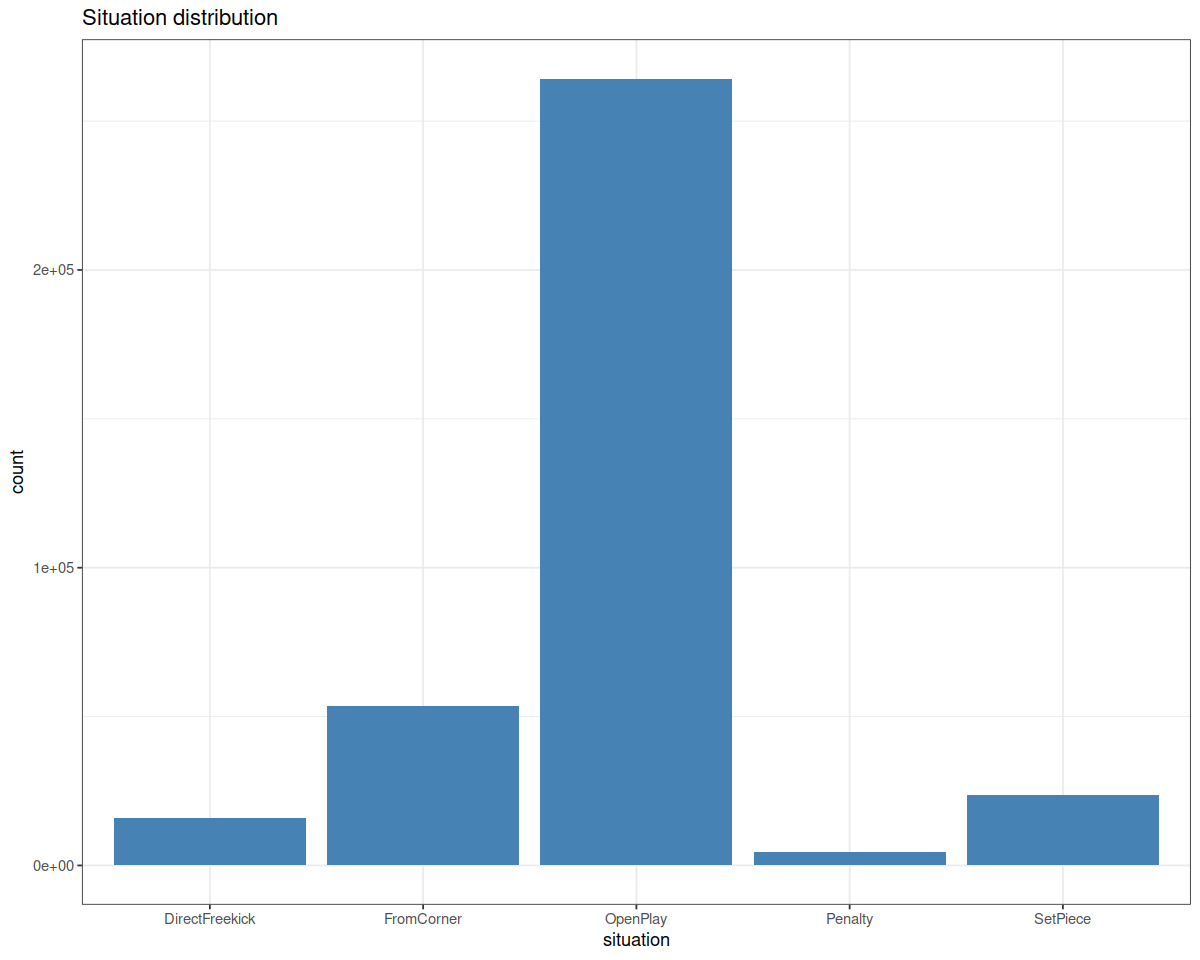

In [ ]:
ggplot(data=df, aes(x=situation)) +
    stat_count(fill="steelblue") +
    ggtitle('Situation distribution') + 
    theme_bw()

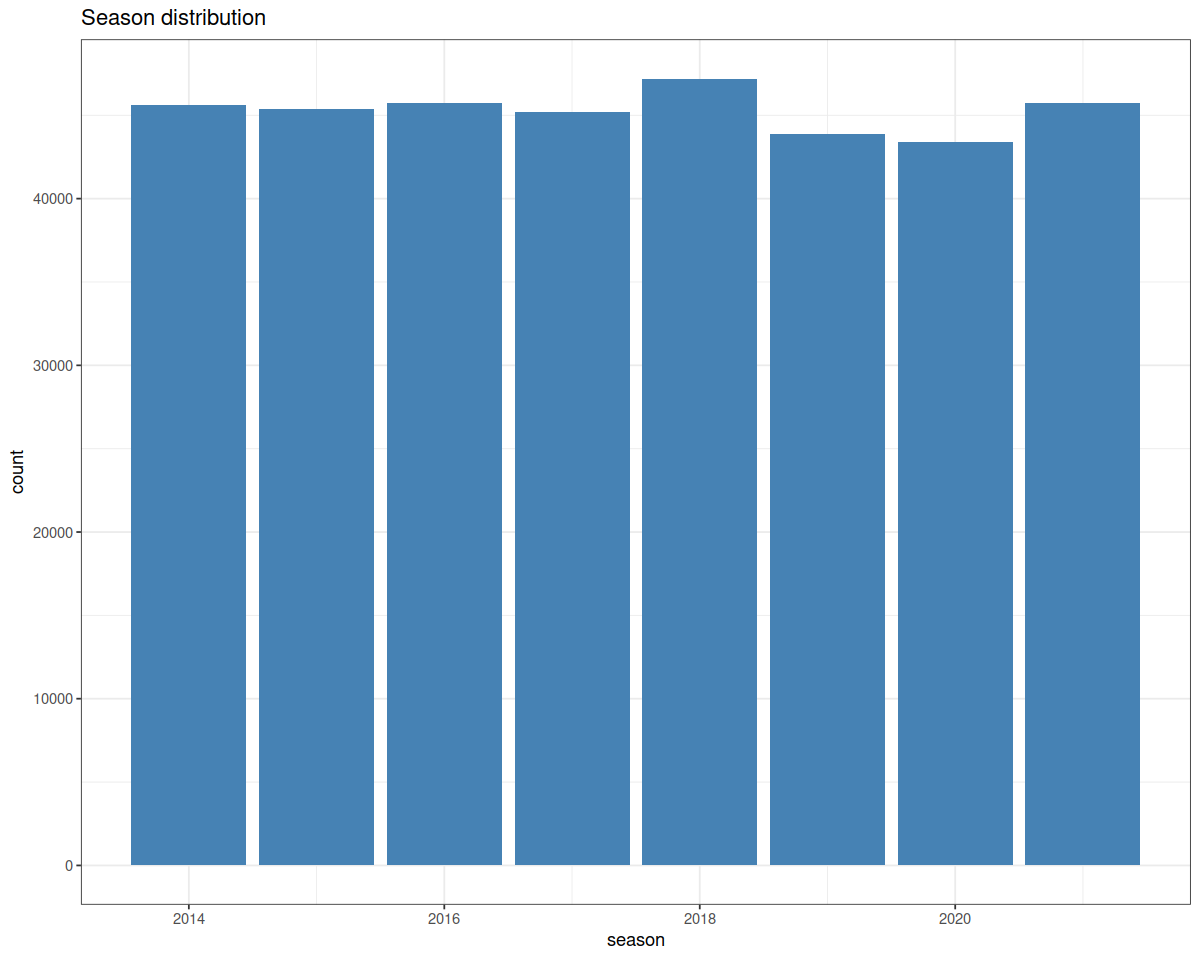

In [ ]:
ggplot(data=df, aes(x=season)) +
    stat_count(fill="steelblue") +
    ggtitle('Season distribution') + 
    theme_bw()

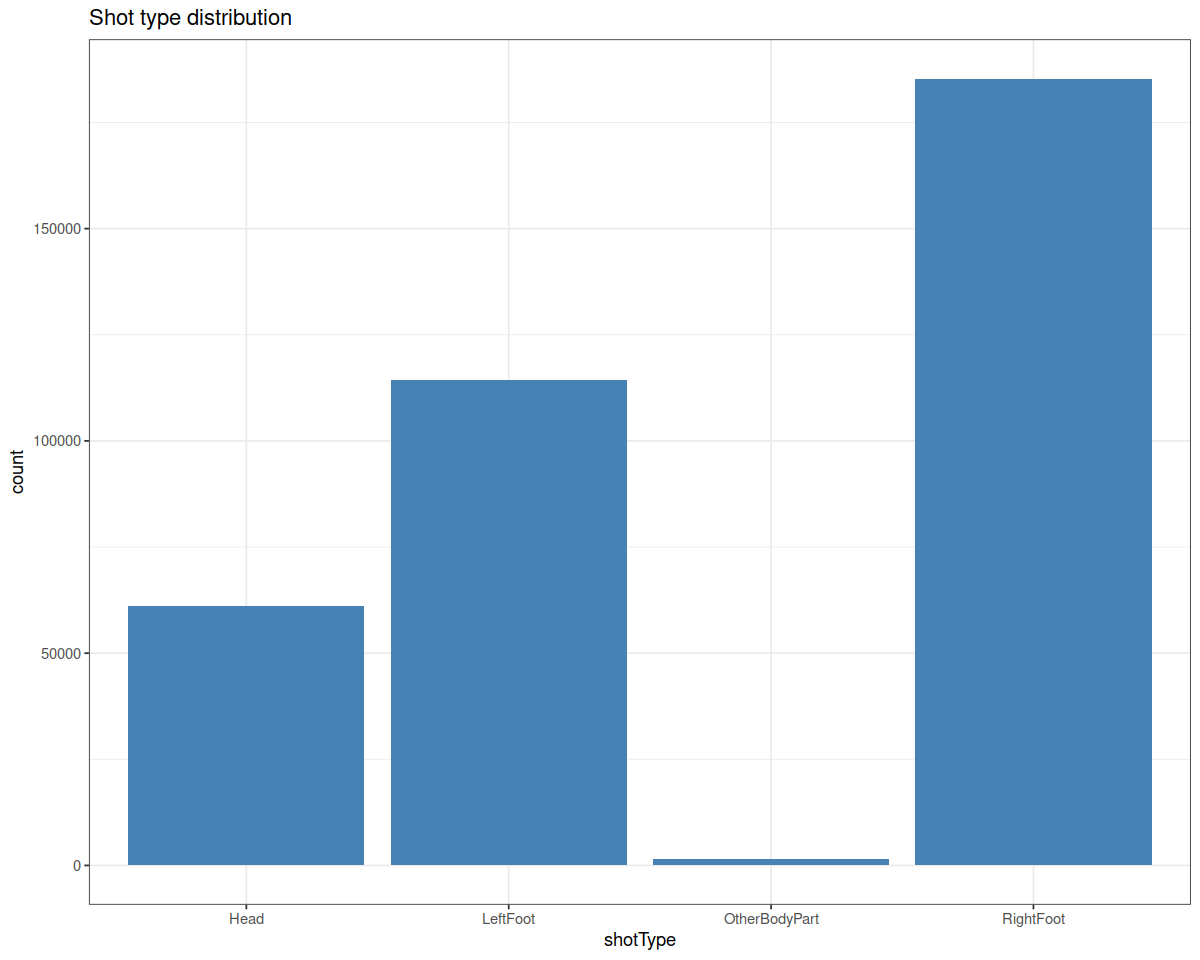

In [ ]:
ggplot(data=df, aes(x=shotType)) +
    stat_count(fill="steelblue") +
    ggtitle('Shot type distribution') + 
    theme_bw()

In [ ]:
goals <- df %>% group_by(match_id) %>% summarise(home_goals = mean(home_goals), away_goals = mean(away_goals))
head(goals)

match_id,home_goals,away_goals
<int>,<dbl>,<dbl>
81,1,0
82,0,1
83,2,2
84,4,2
85,1,3
86,2,2


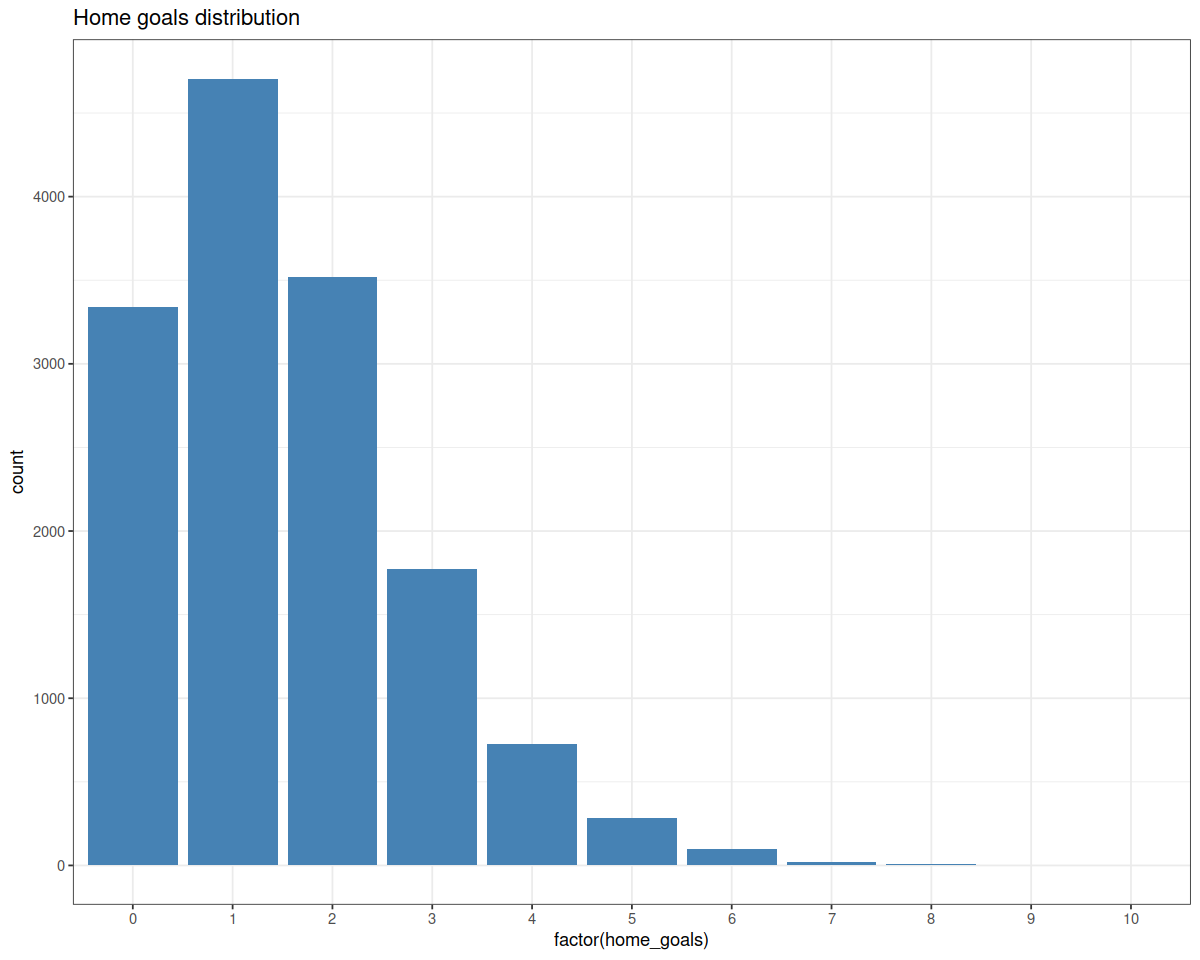

In [ ]:
ggplot(data=goals, aes(x=factor(home_goals))) +
    stat_count(fill="steelblue") +
    ggtitle('Home goals distribution') + 
    theme_bw()

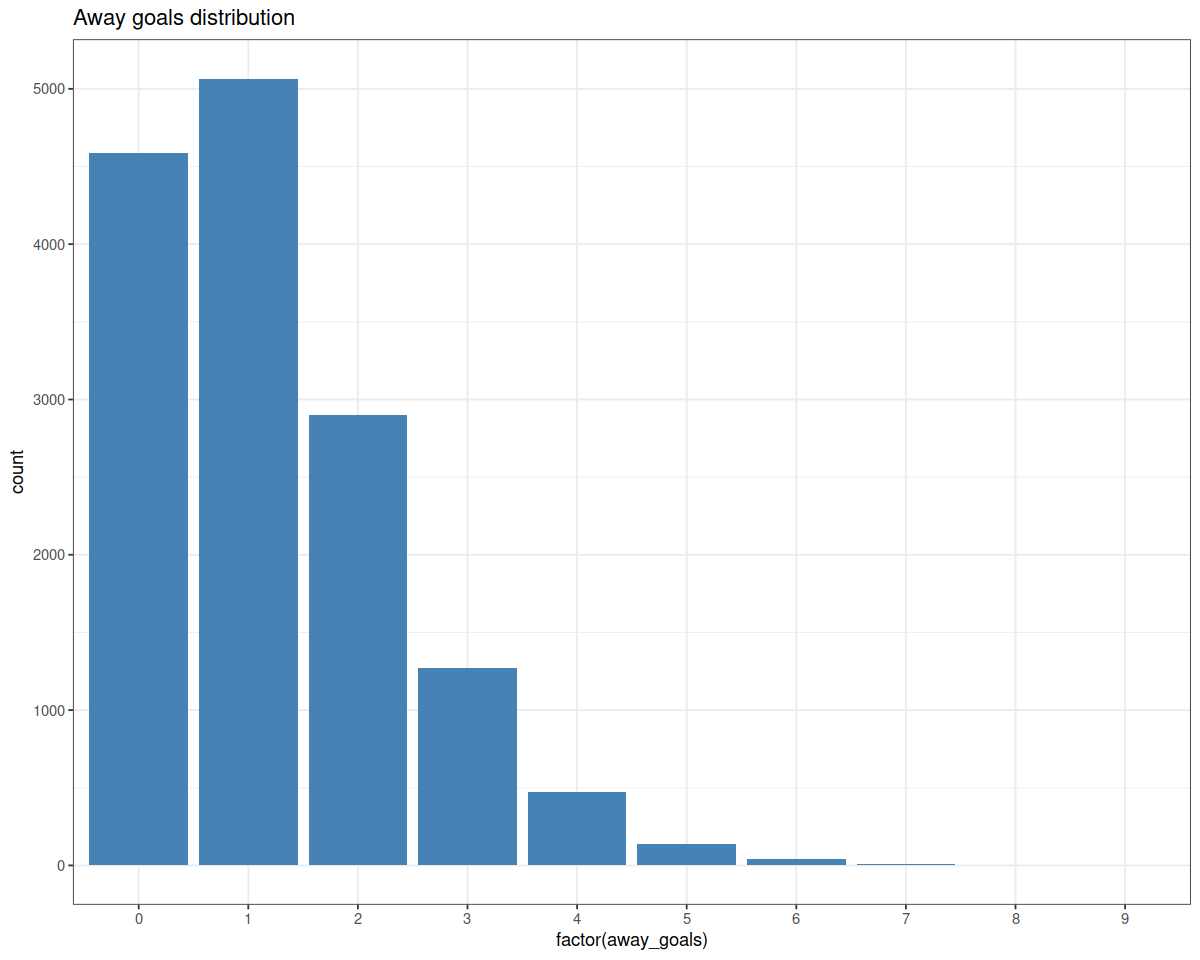

In [ ]:
ggplot(data=goals, aes(x=factor(away_goals))) +
    stat_count(fill="steelblue") +
    ggtitle('Away goals distribution') + 
    theme_bw()

In [ ]:
library(tidyr)

In [ ]:
goals2 <- pivot_longer(data = goals,
                       cols = c('away_goals', 'home_goals'),
                       names_to = 'type',
                       values_to = 'val')

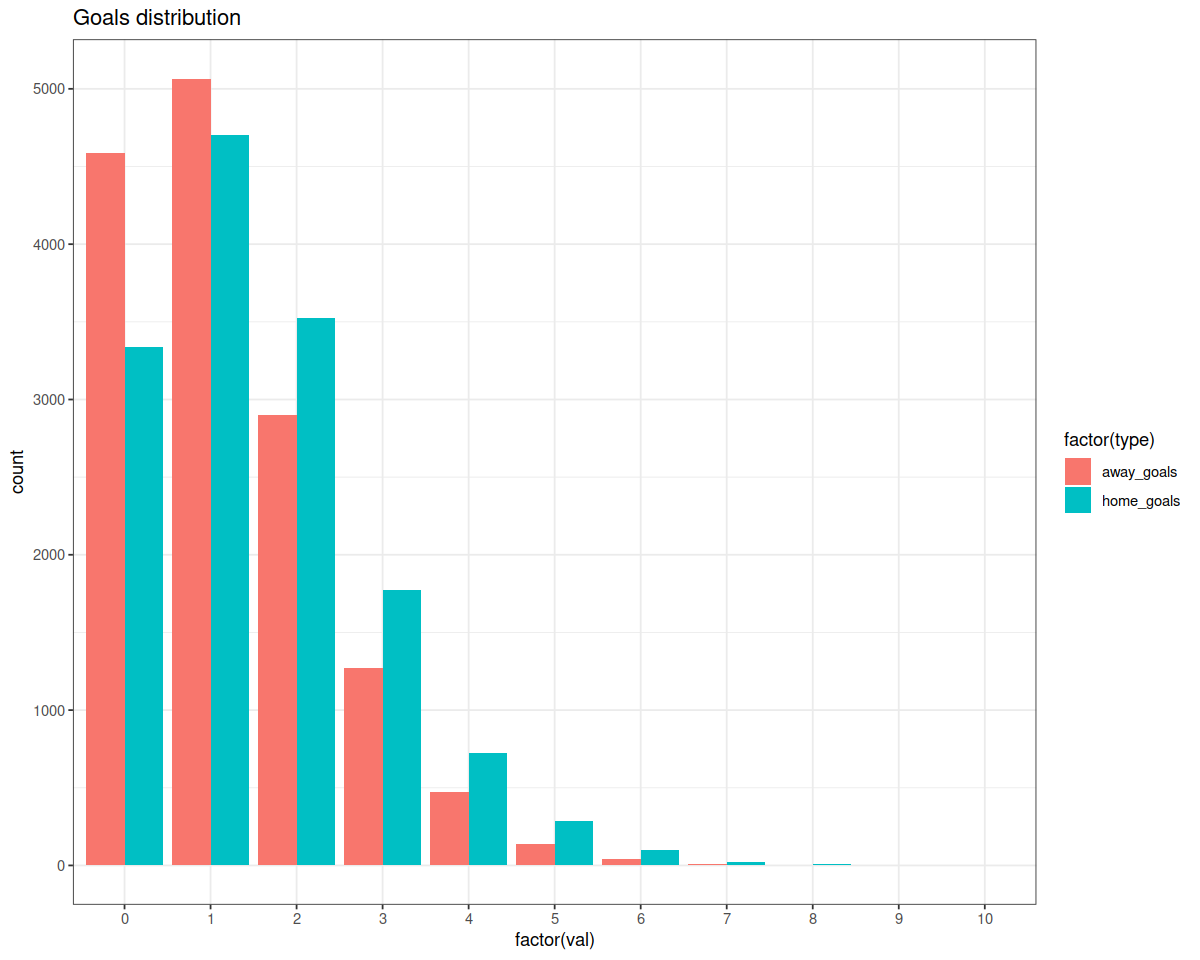

In [ ]:
ggplot(data=goals2, aes(x = factor(val), fill = factor(type))) +
    stat_count(position='dodge') +
    ggtitle('Goals distribution') + 
    theme_bw()

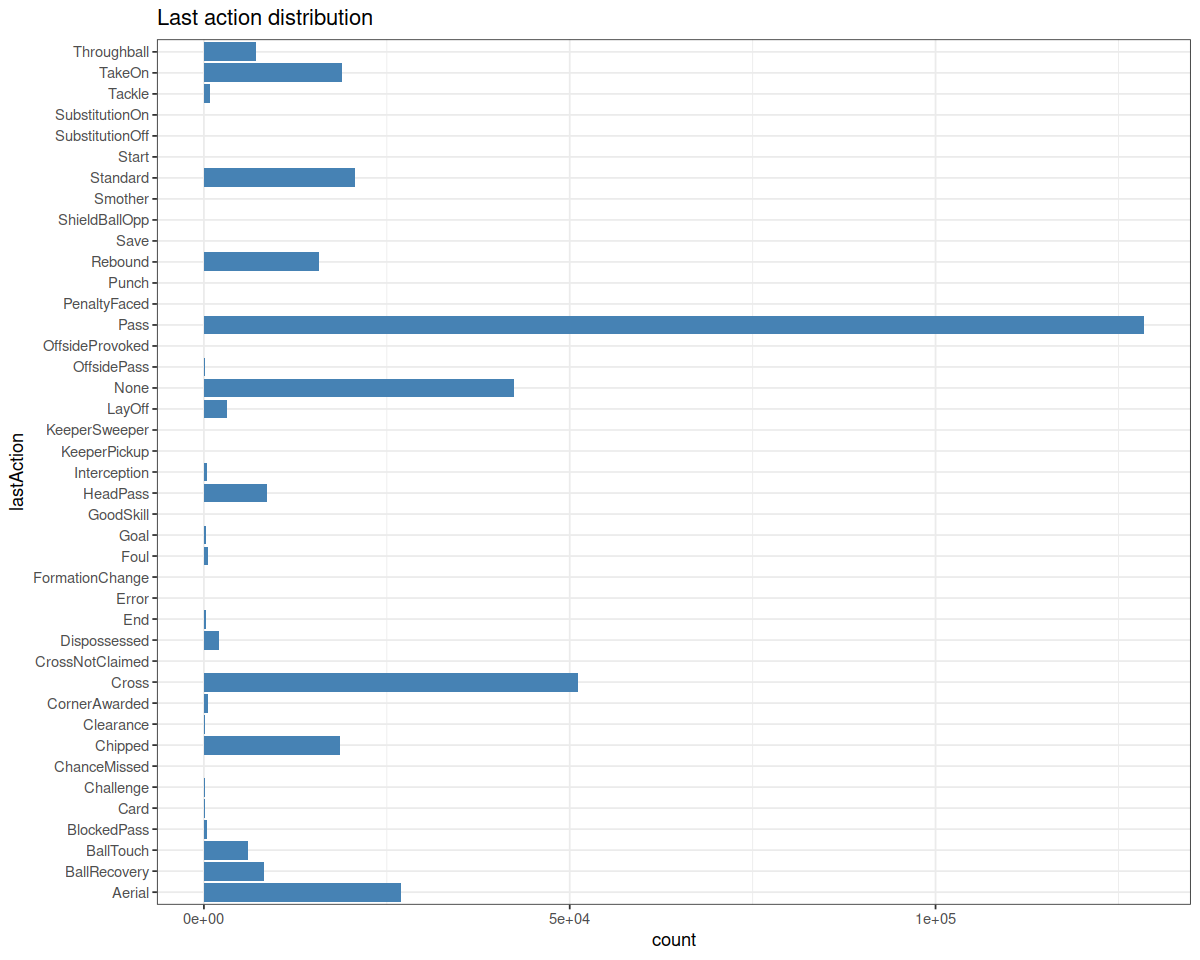

In [ ]:
ggplot(data=df, aes(x=lastAction)) +
    stat_count(fill="steelblue") +
    ggtitle('Last action distribution') + 
    coord_flip() + 
    theme_bw()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=638a36e2-efff-486f-858d-cbca546da2c6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>